In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install Cython numpy


In [ ]:
pip install --upgrade setuptools wheel


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.9/807.9 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [ ]:
!pip install fbprophet


  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
ERROR: Could not build wheels for fbprophet, which is required to install pyproject.toml-based projects


In [ ]:
pip install pystan


  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached httpstan-4.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (44.4 MB)
  Using cached pysimdjson-5.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached crashtest-0.3.1-py3-none-any.whl (7.0 kB)
  Using cached pastel-0.2.1-py2.py3-none-any.whl (6.0 kB)
  Using cached pylev-1.4.0-py2.py3-none-any.whl (6.1 kB)
  Using cached marshmallow-3.20.1-py3-none-any.whl (49 kB)
  Using cached webargs-8.3.0-py3-none-any.whl (31 kB)


In [ ]:
!pip install Cmake

In [ ]:
!pip install fbprophet


  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
ERROR: Could not build wheels for fbprophet, which is required to install pyproject.toml-based projects


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from prophet import Prophet

from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings

warnings.filterwarnings('ignore')

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [ ]:
pjme=pd.read_csv('/content/drive/MyDrive/PJME_hourly.csv',index_col=[0],parse_dates=[0])
pjme.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


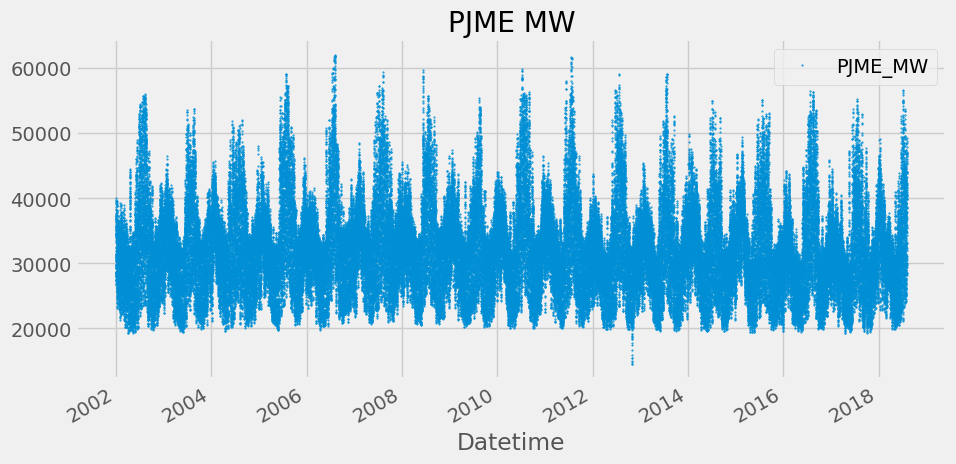

In [ ]:
color_pal=sns.color_palette()
pjme.plot(style='.', figsize=(10,5),
          ms=1,
          color=color_pal[0],
          title='PJME MW')
plt.show()

##time series features

In [ ]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=['Monday','Tuesday',
                                        'Wednesday',
                                        'Thursday','Friday',
                                        'Saturday','Sunday'],
                            ordered=True)

def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['weekday'] = df['date'].dt.day_name()
    df['weekday'] = df['weekday'].astype(cat_type)
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    df['date_offset'] = (df.date.dt.month*100 + df.date.dt.day - 320)%1300

    df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300],
                          labels=['Spring', 'Summer', 'Fall', 'Winter']
                   )
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear','weekday',
           'season']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(pjme, label='PJME_MW')
features_and_target = pd.concat([X, y], axis=1)
features_and_target.head()

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,weekday,season,PJME_MW
Datetime,,,,,,,,,,,
2002-12-31 01:00:00,1,1,4,12,2002,365,31,1,Tuesday,Winter,26498.0
2002-12-31 02:00:00,2,1,4,12,2002,365,31,1,Tuesday,Winter,25147.0
2002-12-31 03:00:00,3,1,4,12,2002,365,31,1,Tuesday,Winter,24574.0
2002-12-31 04:00:00,4,1,4,12,2002,365,31,1,Tuesday,Winter,24393.0
2002-12-31 05:00:00,5,1,4,12,2002,365,31,1,Tuesday,Winter,24860.0


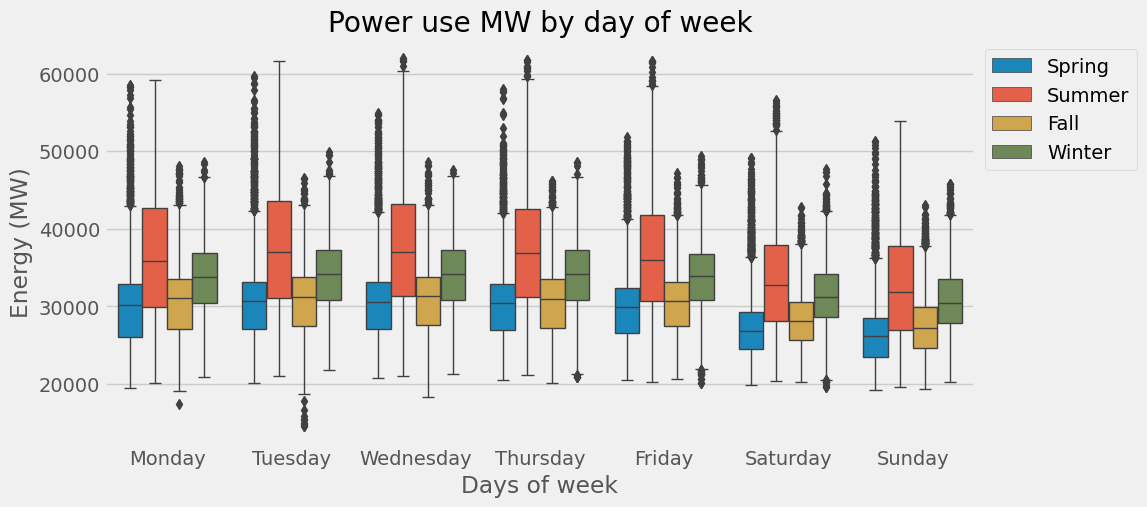

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
sns.boxplot(data=features_and_target.dropna(),
            x='weekday',
            y='PJME_MW',
            hue='season',
            ax=ax,
            linewidth=1)
ax.set_title('Power use MW by day of week')
ax.set_xlabel('Days of week')
ax.set_ylabel('Energy (MW)')
ax.legend(bbox_to_anchor=(1,1))

plt.show()

## train test split


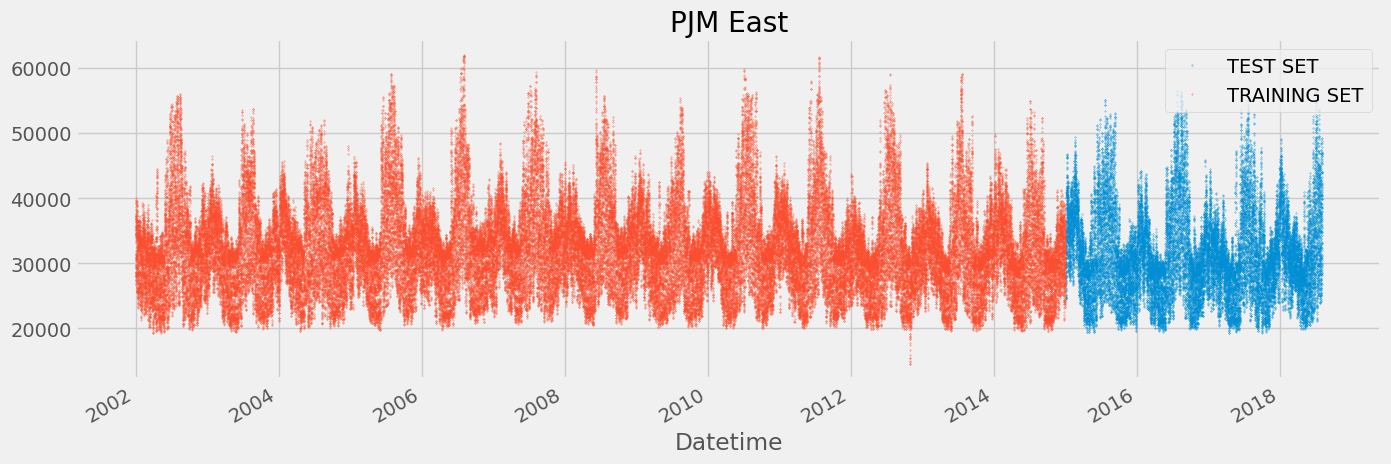

In [ ]:
split_date='1-Jan-2015'
pjme_train=pjme.loc[pjme.index<=split_date].copy()
pjme_test=pjme.loc[pjme.index>split_date].copy()

pjme_test.rename(columns={'PJME_MW':'TEST SET'}).join(pjme_train.rename(columns={'PJME_MW':'TRAINING SET'}),
                                                      how='outer').plot(figsize=(15,5),title='PJM East', style='.', ms=.5)
plt.show()

In [ ]:

pjme_train_prophet=pjme_train.reset_index().rename(columns={'Datetime':'ds','PJME_MW':'y'})

In [ ]:
pjme_train_prophet.head()

,ds,y
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [ ]:
%%time
model=Prophet()
model.fit(pjme_train_prophet)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4pkdjq8v/4ewwrwf6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4pkdjq8v/2gmy64p_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48113', 'data', 'file=/tmp/tmp4pkdjq8v/4ewwrwf6.json', 'init=/tmp/tmp4pkdjq8v/2gmy64p_.json', 'output', 'file=/tmp/tmp4pkdjq8v/prophet_modelxxen_1uw/prophet_model-20230912055636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:56:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:58:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


CPU times: user 10.1 s, sys: 971 ms, total: 11.1 s
Wall time: 1min 36s


In [ ]:

pjme_test_prophet=pjme_test.reset_index().rename(columns={'Datetime':'ds','PJME_MW':'y'})
pjme_test_fcst=model.predict(pjme_test_prophet)

In [ ]:
pjme_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01 01:00:00,31196.569737,23747.957037,32538.601686,31196.569737,31196.569737,-2832.039685,-2832.039685,-2832.039685,-4430.340618,...,1281.401850,1281.401850,1281.401850,316.899083,316.899083,316.899083,0.0,0.0,0.0,28364.530052
1,2015-01-01 02:00:00,31196.530226,22361.337541,31169.604447,31196.530226,31196.530226,-4336.382472,-4336.382472,-4336.382472,-5927.234241,...,1272.642609,1272.642609,1272.642609,318.209160,318.209160,318.209160,0.0,0.0,0.0,26860.147754
2,2015-01-01 03:00:00,31196.490715,21468.093820,30601.531967,31196.490715,31196.490715,-5208.068991,-5208.068991,-5208.068991,-6790.307358,...,1262.677669,1262.677669,1262.677669,319.560697,319.560697,319.560697,0.0,0.0,0.0,25988.421725
3,2015-01-01 04:00:00,31196.451205,20973.324406,30193.157433,31196.451205,31196.451205,-5349.632017,-5349.632017,-5349.632017,-6922.216362,...,1251.630624,1251.630624,1251.630624,320.953721,320.953721,320.953721,0.0,0.0,0.0,25846.819188
4,2015-01-01 05:00:00,31196.411694,21845.832124,30961.168382,31196.411694,31196.411694,-4675.310856,-4675.310856,-4675.310856,-6237.336387,...,1239.637275,1239.637275,1239.637275,322.388256,322.388256,322.388256,0.0,0.0,0.0,26521.100838


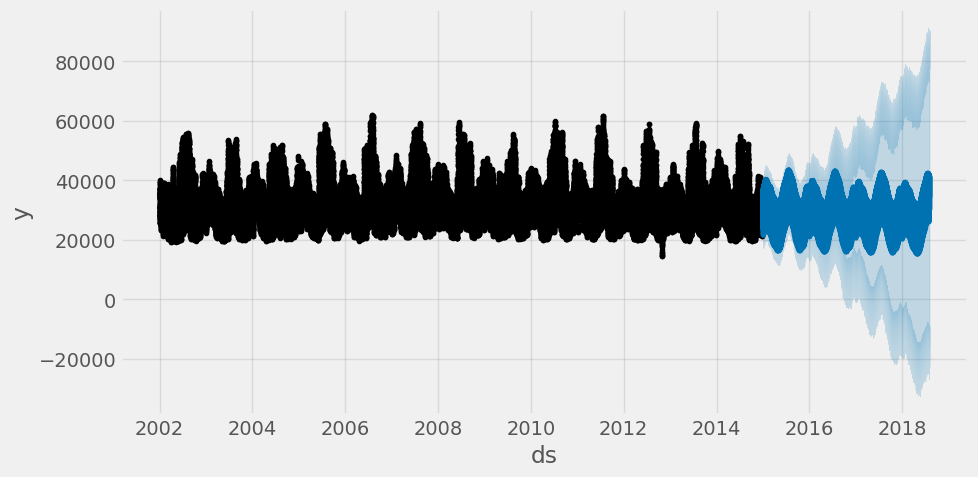

In [ ]:
fig ,ax=plt.subplots(figsize=(10,5))
fig=model.plot(pjme_test_fcst,ax=ax)
plt.show()


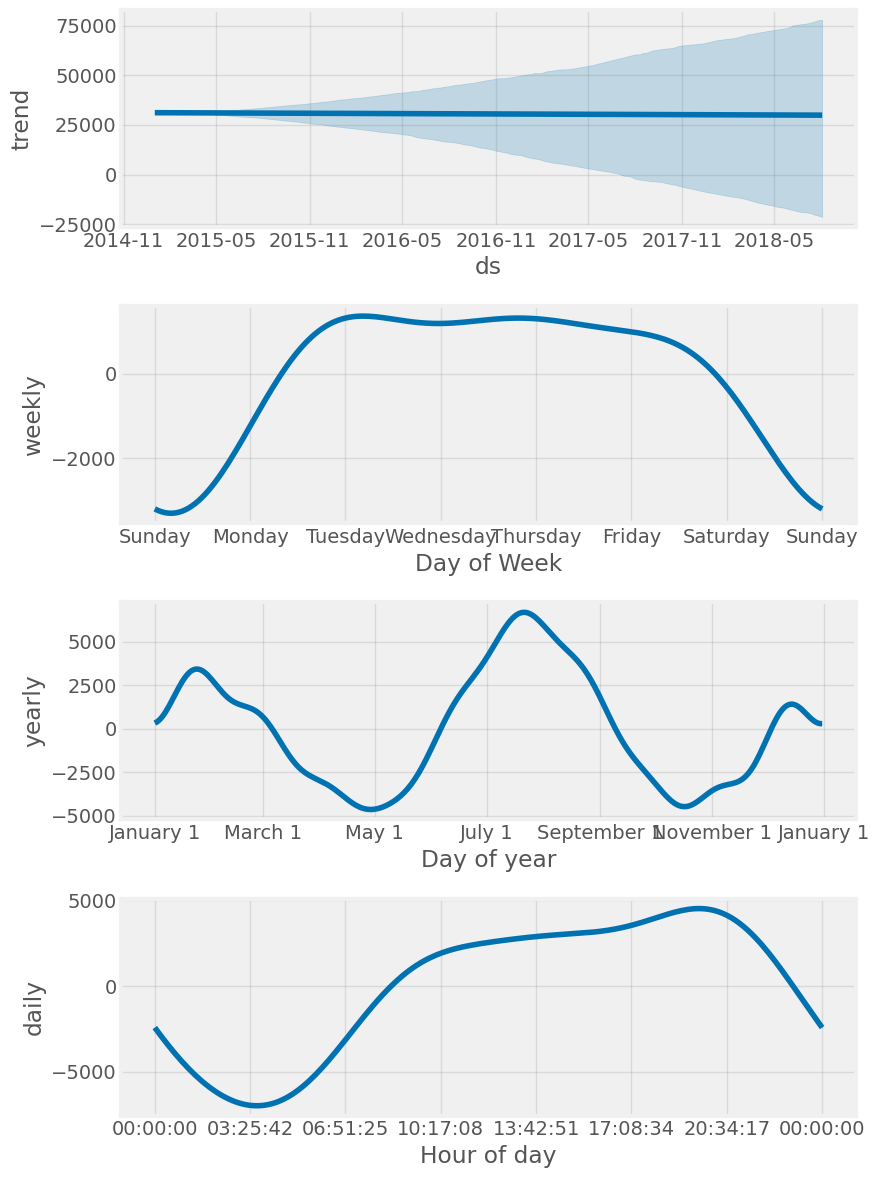

In [ ]:
model.plot_components(pjme_test_fcst)
plt.show()

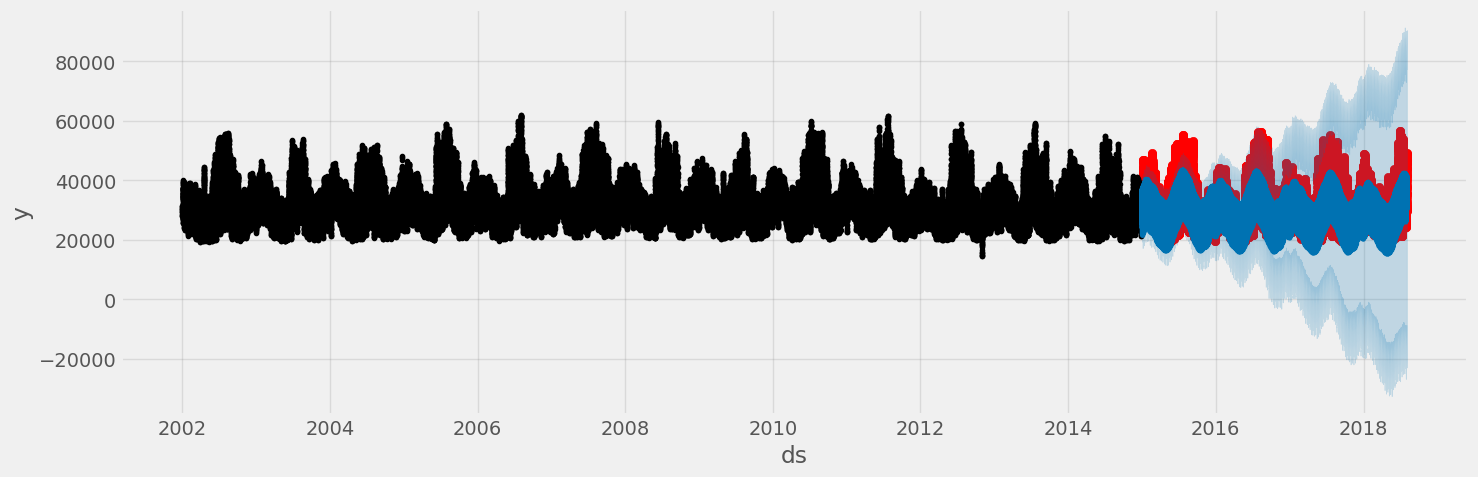

In [ ]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(pjme_test.index, pjme_test['PJME_MW'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)

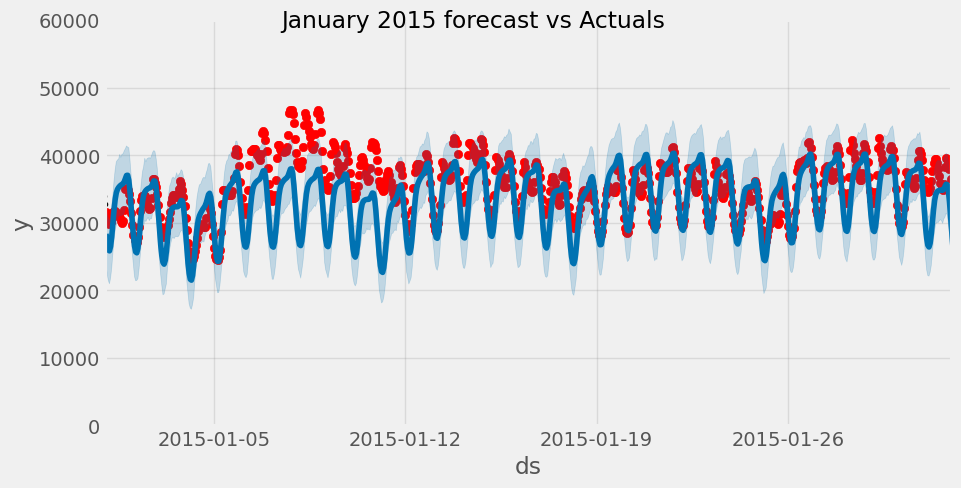

In [ ]:
import matplotlib.dates as mdates

# Assuming you have already defined the 'model' and 'pjme_test_fcst' variables

f, ax = plt.subplots(figsize=(10, 5))
ax.scatter(pjme_test.index, pjme_test['PJME_MW'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)

# Convert date strings to datetime objects
start_date = '2015-01-01'
end_date = '2015-02-01'
start_date = mdates.datestr2num(start_date)
end_date = mdates.datestr2num(end_date)

ax.set_xlim(start_date, end_date)  # Set x-axis limits using datetime values
ax.set_ylim(0, 60000)
plt.suptitle('January 2015 forecast vs Actuals')
plt.show()

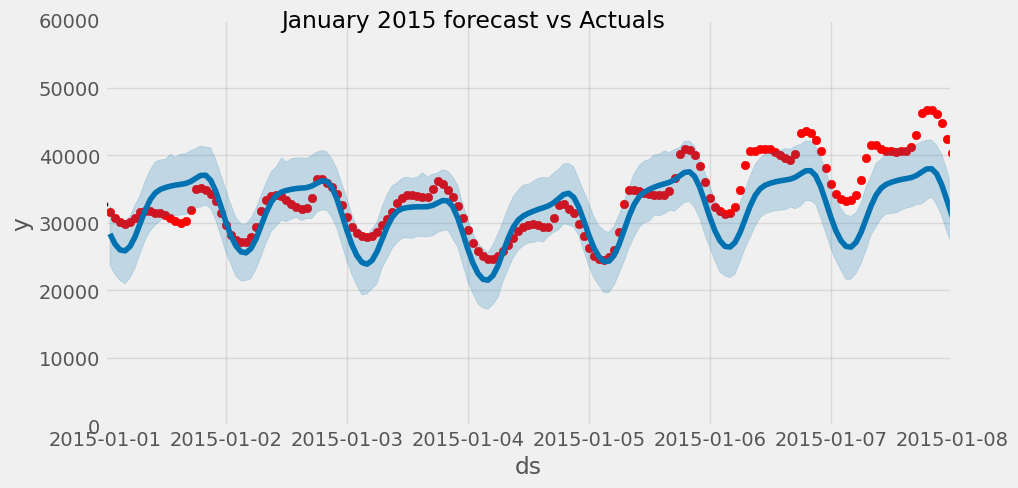

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
ax.scatter(pjme_test.index, pjme_test['PJME_MW'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)

# Convert date strings to datetime objects
start_date = '2015-01-01'
end_date = '2015-01-08'
start_date = mdates.datestr2num(start_date)
end_date = mdates.datestr2num(end_date)

ax.set_xlim(start_date, end_date)  # Set x-axis limits using datetime values
ax.set_ylim(0, 60000)
plt.suptitle('January 2015 forecast vs Actuals')
plt.show()

## evaluate the model with error meterics


In [ ]:
np.sqrt(mean_squared_error(y_true=pjme_test['PJME_MW'],
                           y_pred=pjme_test_fcst['yhat']))


6620.122629528544

In [ ]:
mean_absolute_error(y_true=pjme_test['PJME_MW'],
                           y_pred=pjme_test_fcst['yhat'])

5184.237000062714

In [ ]:
mean_absolute_percentage_error(y_true=pjme_test['PJME_MW'],
                           y_pred=pjme_test_fcst['yhat'])

16.503231552883825

##adding holidays


In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal=calendar()
holiday=cal.holidays(start=pjme.index.min(),
                      end=pjme.index.max(),
                      return_name=True)
holiday_df=pd.DataFrame(data=holiday, columns=['holiday'])
holiday_df=holiday_df.reset_index().rename(columns={'index':'ds'})


In [ ]:
holiday_df.head()

,ds,holiday
0,2002-01-21,"Birthday of Martin Luther King, Jr."
1,2002-02-18,Washington’s Birthday
2,2002-05-27,Memorial Day
3,2002-07-04,Independence Day
4,2002-09-02,Labor Day


In [ ]:
Prophet(holidays=holiday_df)

In [ ]:
%%time
model_with_holidays=Prophet(holidays=holiday_df)
model_with_holidays.fit(pjme_train_prophet)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4pkdjq8v/5t_7tith.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4pkdjq8v/o6v1dj9p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36508', 'data', 'file=/tmp/tmp4pkdjq8v/5t_7tith.json', 'init=/tmp/tmp4pkdjq8v/o6v1dj9p.json', 'output', 'file=/tmp/tmp4pkdjq8v/prophet_modelr0v_6vtr/prophet_model-20230912064136.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:41:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:43:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


CPU times: user 15.9 s, sys: 1.38 s, total: 17.3 s
Wall time: 2min 40s


In [ ]:
pjme_test_fcst_with_hols=model_with_holidays.predict(df=pjme_test_prophet)

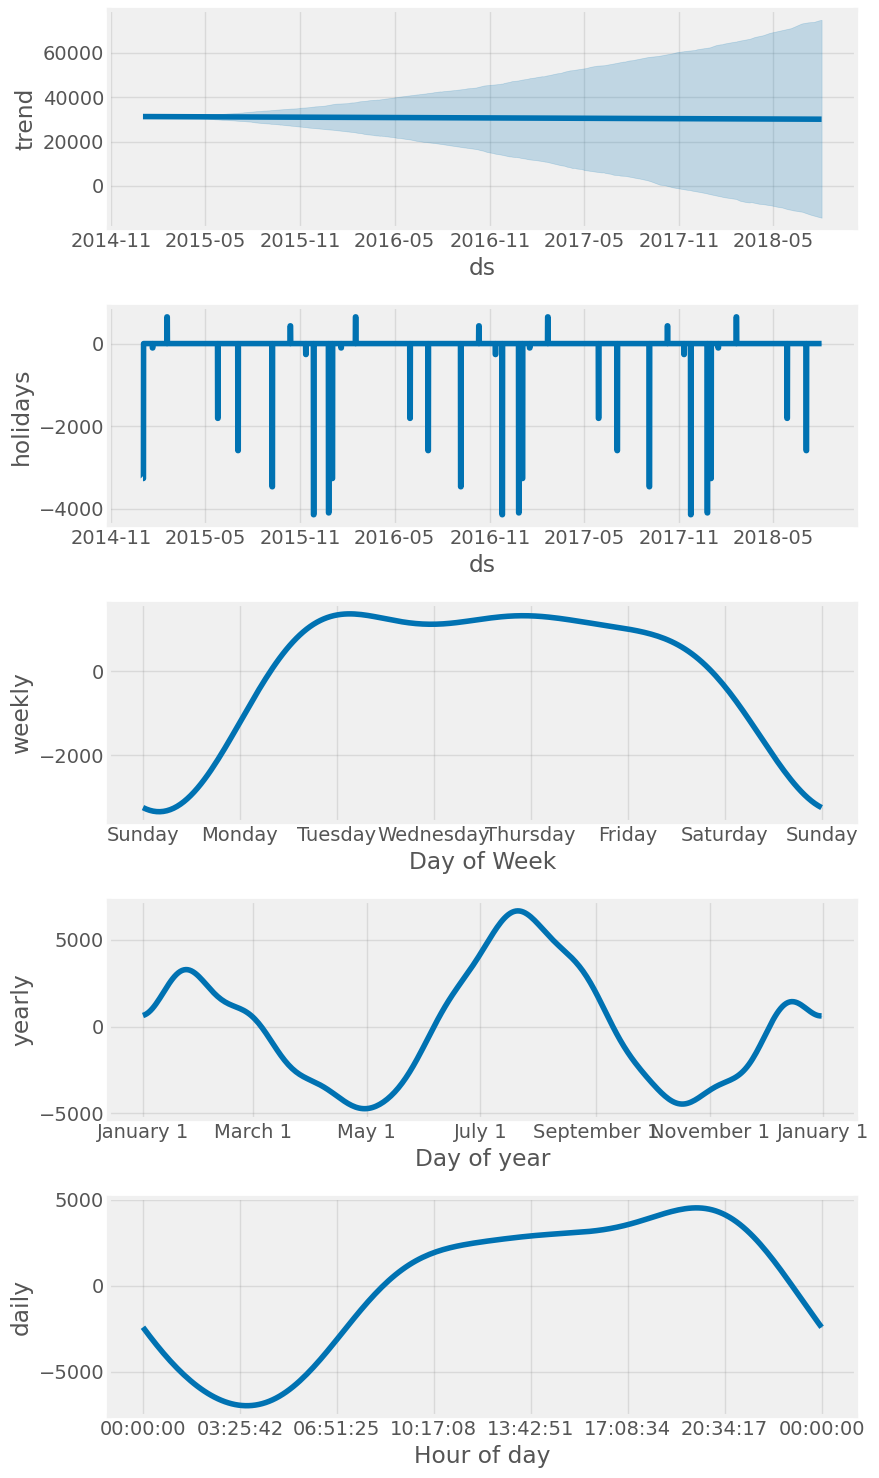

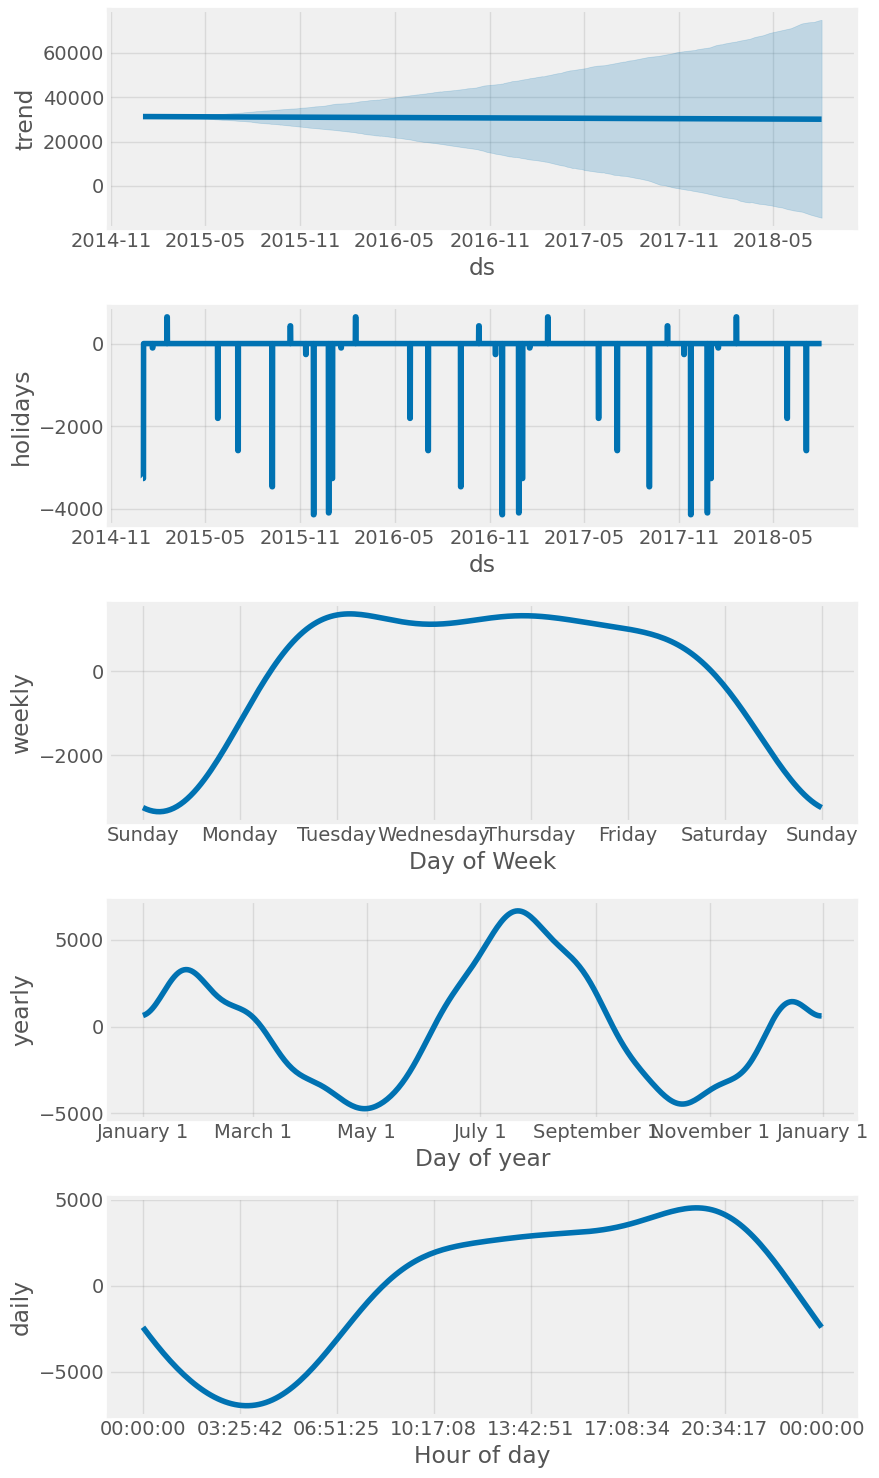

In [ ]:
model_with_holidays.plot_components(
    pjme_test_fcst_with_hols
)

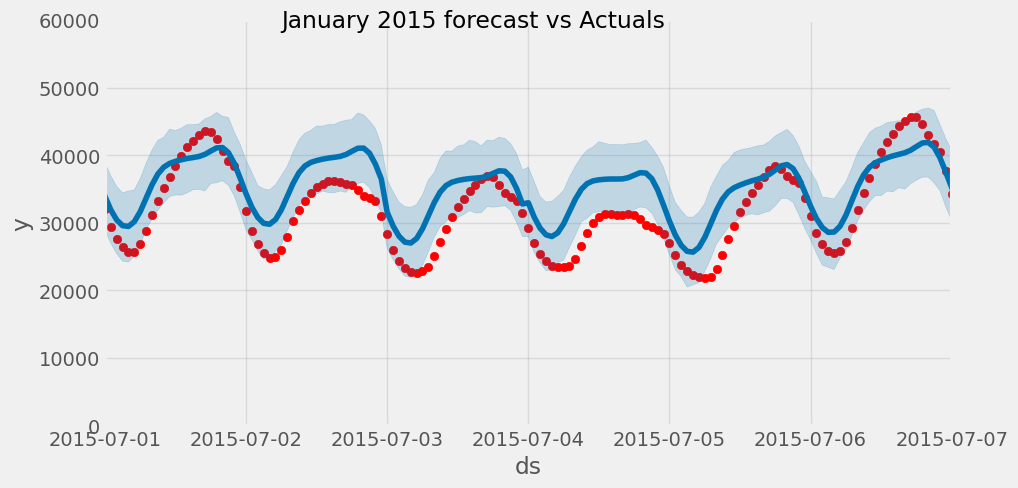

In [ ]:
# fig, ax = plt.subplots(figsize=(10, 5))
# ax.scatter(pjme_test.index, pjme_test['PJME_MW'], color='r')
# fig = model.plot(pjme_test_fcst_with_hols, ax=ax)
# ax.set_xbound(lower='07-01-2015',
#               upper='07-07-2015')
# ax.set_ylim(0, 60000)
# plot = plt.suptitle('July 4 Predictions vs Actual')
f, ax = plt.subplots(figsize=(10, 5))
ax.scatter(pjme_test.index, pjme_test['PJME_MW'], color='r')
fig = model.plot(pjme_test_fcst_with_hols, ax=ax)

# Convert date strings to datetime objects
start_date = '2015-07-01'
end_date = '2015-07-07'
start_date = mdates.datestr2num(start_date)
end_date = mdates.datestr2num(end_date)

ax.set_xlim(start_date, end_date)  # Set x-axis limits using datetime values
ax.set_ylim(0, 60000)
plt.suptitle('July 4th forecast vs Actuals')
plt.show()

In [ ]:
np.sqrt(mean_squared_error(y_true=pjme_test['PJME_MW'],
                   y_pred=pjme_test_fcst_with_hols['yhat']))

6638.057429135685

In [ ]:
mean_absolute_error(y_true=pjme_test['PJME_MW'],
                   y_pred=pjme_test_fcst_with_hols['yhat'])

5200.020394851061

In [ ]:
mean_absolute_percentage_error(y_true=pjme_test['PJME_MW'],
                   y_pred=pjme_test_fcst_with_hols['yhat'])

16.565548837610333

###predict the future

In [ ]:
future=model.make_future_dataframe(periods=365*24, freq='h',include_history=False)
forecast=model_with_holidays.predict(future)

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,"Birthday of Martin Luther King, Jr.","Birthday of Martin Luther King, Jr._lower","Birthday of Martin Luther King, Jr._upper",Christmas Day,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01 01:00:00,31256.502998,21200.575563,29798.331300,31256.502998,31256.502998,0.0,0.0,0.0,0.0,...,1324.515555,1324.515555,1324.515555,631.808113,631.808113,631.808113,0.0,0.0,0.0,25515.269664
1,2015-01-01 02:00:00,31256.465182,19890.944268,28621.638502,31256.465182,31256.465182,0.0,0.0,0.0,0.0,...,1318.722877,1318.722877,1318.722877,632.737881,632.737881,632.737881,0.0,0.0,0.0,24013.233628
2,2015-01-01 03:00:00,31256.427366,19228.662929,27707.186192,31256.427366,31256.427366,0.0,0.0,0.0,0.0,...,1311.389426,1311.389426,1311.389426,633.701440,633.701440,633.701440,0.0,0.0,0.0,23143.648216
3,2015-01-01 04:00:00,31256.389550,18618.586856,27680.023168,31256.389550,31256.389550,0.0,0.0,0.0,0.0,...,1302.626127,1302.626127,1302.626127,634.698825,634.698825,634.698825,0.0,0.0,0.0,23004.027688
4,2015-01-01 05:00:00,31256.351734,19349.137839,28058.567558,31256.351734,31256.351734,0.0,0.0,0.0,0.0,...,1292.559775,1292.559775,1292.559775,635.730075,635.730075,635.730075,0.0,0.0,0.0,23680.027122
